In [401]:
import numpy as np
import pandas as pd

from keras.layers import LSTM
from __future__ import print_function
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation

In [402]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import math, time
from sklearn.metrics import mean_squared_error

In [403]:
data = pd.read_csv('C:/Users/juanj/Documents/GitHub/Aprendizaje-Profundo/temperatura.csv')

data.head()

,ID,FECHA,TMP
0,1,01/01/2023,13.9
1,2,01/01/2023,11.7
2,3,01/01/2023,9.4
3,4,01/01/2023,8.1
4,5,01/01/2023,7.7


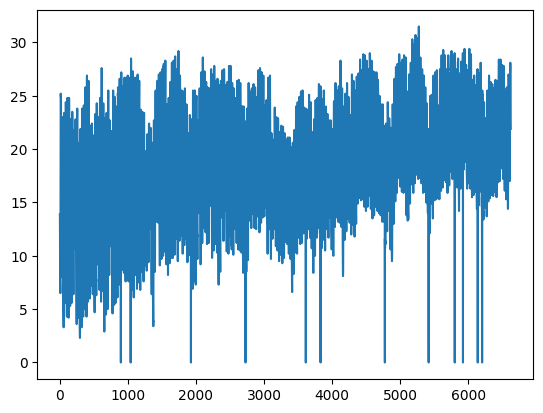

In [404]:
plt.plot(data['TMP'])
plt.show()

In [405]:
len(data)

6628

In [406]:
#normalizamos

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data = min_max_scaler.fit_transform(data['TMP'].values.reshape(-1,1))

In [407]:
data.shape

(6628, 1)

In [408]:
data[0:10]

array([[0.44126984],
       [0.37142857],
       [0.2984127 ],
       [0.25714286],
       [0.24444444],
       [0.22539683],
       [0.21269841],
       [0.20634921],
       [0.31428571],
       [0.47301587]])

In [409]:
train_size =int(len(data)* 0.7)
test_size =len(data)- train_size
train, test =data[0:train_size,:], data[train_size:len(data),:]
print(len(train),len(test))

4639 1989


In [410]:
def create_matrix(data, look_back=15):
    dataX, dataY = [],[]
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(data[i + look_back,0])
    return np.array(dataX), np.array(dataY)

In [411]:
x_train, y_train = create_matrix(train, look_back=15)
x_test, y_test = create_matrix(test, look_back=15)

In [412]:
display(x_train)

array([[0.44126984, 0.37142857, 0.2984127 , ..., 0.8       , 0.75238095,
        0.79047619],
       [0.37142857, 0.2984127 , 0.25714286, ..., 0.75238095, 0.79047619,
        0.78730159],
       [0.2984127 , 0.25714286, 0.24444444, ..., 0.79047619, 0.78730159,
        0.78730159],
       ...,
       [0.5047619 , 0.56825397, 0.62857143, ..., 0.71428571, 0.66666667,
        0.62539683],
       [0.56825397, 0.62857143, 0.7047619 , ..., 0.66666667, 0.62539683,
        0.61269841],
       [0.62857143, 0.7047619 , 0.75238095, ..., 0.62539683, 0.61269841,
        0.59047619]])

In [413]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4623, 15)
(4623,)
(1973, 15)
(1973,)


In [414]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [415]:
x_train

array([[[0.44126984, 0.37142857, 0.2984127 , ..., 0.8       ,
         0.75238095, 0.79047619]],

       [[0.37142857, 0.2984127 , 0.25714286, ..., 0.75238095,
         0.79047619, 0.78730159]],

       [[0.2984127 , 0.25714286, 0.24444444, ..., 0.79047619,
         0.78730159, 0.78730159]],

       ...,

       [[0.5047619 , 0.56825397, 0.62857143, ..., 0.71428571,
         0.66666667, 0.62539683]],

       [[0.56825397, 0.62857143, 0.7047619 , ..., 0.66666667,
         0.62539683, 0.61269841]],

       [[0.62857143, 0.7047619 , 0.75238095, ..., 0.62539683,
         0.61269841, 0.59047619]]])

In [416]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4623, 1, 15)
(4623,)
(1973, 1, 15)
(1973,)


In [417]:
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mape', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)


Epoch 1/20
4623/4623 - 6s - loss: 344150.3438 - 6s/epoch - 1ms/step
Epoch 2/20
4623/4623 - 5s - loss: 132880.7656 - 5s/epoch - 1ms/step
Epoch 3/20
4623/4623 - 6s - loss: 116859.8750 - 6s/epoch - 1ms/step
Epoch 4/20
4623/4623 - 6s - loss: 84372.2500 - 6s/epoch - 1ms/step
Epoch 5/20
4623/4623 - 6s - loss: 58033.1680 - 6s/epoch - 1ms/step
Epoch 6/20
4623/4623 - 5s - loss: 74831.3906 - 5s/epoch - 1ms/step
Epoch 7/20
4623/4623 - 6s - loss: 49349.2227 - 6s/epoch - 1ms/step
Epoch 8/20
4623/4623 - 5s - loss: 28095.5820 - 5s/epoch - 1ms/step
Epoch 9/20
4623/4623 - 5s - loss: 40870.1055 - 5s/epoch - 1ms/step
Epoch 10/20
4623/4623 - 5s - loss: 30763.1895 - 5s/epoch - 1ms/step
Epoch 11/20
4623/4623 - 5s - loss: 18646.0430 - 5s/epoch - 1ms/step
Epoch 12/20
4623/4623 - 5s - loss: 25809.4102 - 5s/epoch - 1ms/step
Epoch 13/20
4623/4623 - 5s - loss: 13269.6504 - 5s/epoch - 1ms/step
Epoch 14/20
4623/4623 - 5s - loss: 20470.6445 - 5s/epoch - 1ms/step
Epoch 15/20
4623/4623 - 5s - loss: 17132.0098 - 5s/epo

In [418]:
trainPrediction = model.predict(x_train)
testPrediction = model.predict(x_test)

62/62 [==============================] - 0s 1ms/step


In [419]:
trainPrediction

array([[-0.00015723],
       [-0.00015695],
       [-0.00015879],
       ...,
       [-0.0001649 ],
       [-0.00016496],
       [-0.00016501]], dtype=float32)

In [420]:
trainPrediction = min_max_scaler.inverse_transform(trainPrediction)
trainY = min_max_scaler.inverse_transform([y_train])
testPrediction = min_max_scaler.inverse_transform(testPrediction)
testY = min_max_scaler.inverse_transform([y_test])

In [421]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPrediction)+look_back,:] = trainPrediction

In [422]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPrediction)+(look_back*2)+1:len(data)-1,:] = testPrediction

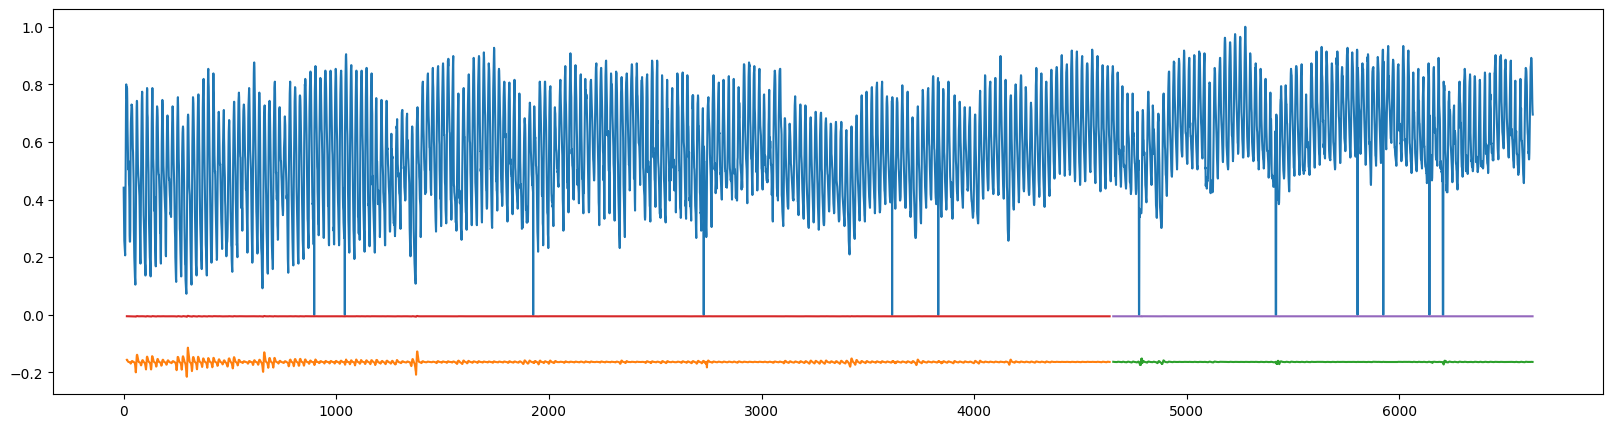

In [424]:

plt.figure(figsize=(20,5))
plt.plot((data))
plt.plot(min_max_scaler.inverse_transform(trainPredictPlot))
plt.plot(min_max_scaler.inverse_transform(testPredictPlot))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()#